<a href="https://colab.research.google.com/github/UMassIonTrappers/quantum-computing-labs/blob/main/Lab_09_Deutsch_Jozsa_and_Bernstein_Vazirani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE 550/650

## Introduction to Quantum Computing

Robert Niffenegger (rniffenegger@umass.edu )

In [ ]:
try:
  import qiskit
except ImportError:
  print('Install Qiskit')
  !pip install --quiet qiskit
  !pip install --quiet qiskit[visualization]
  !pip install --quiet git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
  !pip install --quiet qiskit_ibm_provider[visualization]
  !pip install --quiet qiskit-ibm-runtime

Install Qiskit
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.3 MB/s eta 0:00:00


In [ ]:
try:
  from qiskit_aer import QasmSimulator
  print('Qiskit Aer imported');
except ImportError:
  print('Install Qiskit-Aer')
  !pip install --quiet qiskit-aer

Install Qiskit-Aer
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 26.5 MB/s eta 0:00:00


In [ ]:
try:
  import ibm_quantum_widgets
except ImportError:
  !pip install --quiet ibm-quantum-widgets

ERROR: Could not find a version that satisfies the requirement ibm-quantum-widgets (from versions: none)
ERROR: No matching distribution found for ibm-quantum-widgets


In [ ]:
!pip install --quiet qiskit_ibm_provider[visualization]
!pip install --quiet qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.5/323.5 kB 18.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 12.1 MB/s eta 0:00:00


### Initialize

In [ ]:
%matplotlib inline
from IPython.display import display, Math, Image
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sqrt, sin, cos
import math
import time


#Plot setup
from pylab import *
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

In [ ]:
#Qisket imports
from qiskit_aer import QasmSimulator

from qiskit import QuantumCircuit, transpile, assemble
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_bloch_multivector, plot_histogram
# from qiskit import *

# from qiskit.providers.aer import QasmSimulator
# from qiskit.providers.ibmq import least_busy
# from qiskit.providers.basicaer import BasicAer
# from qiskit.providers.aer.noise import *

from qiskit.circuit.library import *
from qiskit.circuit.library import GroverOperator
from qiskit.quantum_info.operators import Operator
from qiskit.quantum_info import Statevector

'''
In Jupyter Notebooks we can display this nicely using Latex.
'''
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_bloch_multivector, plot_histogram

In [ ]:
"""
Show ALL outputs, not just last expression
"""
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


#Lab 9 - Deutsch-Jozsa  and Bernstein-Vazirani Algorithms

Overview of Oracle query algorithms.

# Deutsch-Jozsa Algorithm



Problem:

We want to know how a function 'f' will respond to almost all of its possible inputs without having to input them all into the function to check.


That is, a function f(x) will take a binary bit string 'x' and output a '0' or a '1' and we know that the function is of two possible types. Either:
1.  Constant - outputting 0 or 1 **regardless** of the input

***or ***

2.  Balanced - outputting '0' 50% of the time and '1' 50% of the time.

Our task is to figure out what type of function it is.
1. Does it always output 1? Does it always output 0? → Then it is constant.
1. Does it output 1 half of the time? (and 0 the other half?) → Then it is balanced.

---

**Classically** we would need to check HALF of the possible inputs (plus one more) as a worst case to know which is which! If all are the same then we know it is a constant function, but if any are different then it must be balanced.

Quantum Mechanically we only need to query **once**!!!

How!?!?!

Let's walk through an example.

References:
* Lecture by Deutsch - http://www.quiprocone.org/Protected/Lecture_5.htm
* https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html


##Constant Oracle
Start by creating a constant oracle by randomly setting the output qubit to be 0 or 1 (regardless of the input register).

'\nConstant Oracle\n'

Constant oracle output = 1


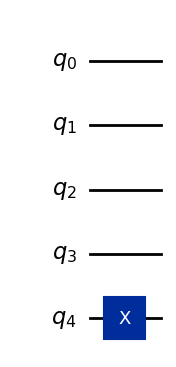

In [ ]:
# Set the size of the input register
n = 4

'''
Constant Oracle
'''
const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)
    print("Constant oracle output = 1")
else:
    print("Constant oracle output = 0")

const_oracle.draw('mpl')

###Constant oracle is boring...
Note nothing really happens. Because the function doesn't care what the input is it just either randomly sets the output to be 0 or 1 using an X-gate...

We could input all of the possible permutations but it just will output the same state... Lame.

##Balanced Oracle

Now create a balanced oracle.

One way to create a balanced oracle is by performing CNOTs with each input qubit as a control and the output bit as the target.


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

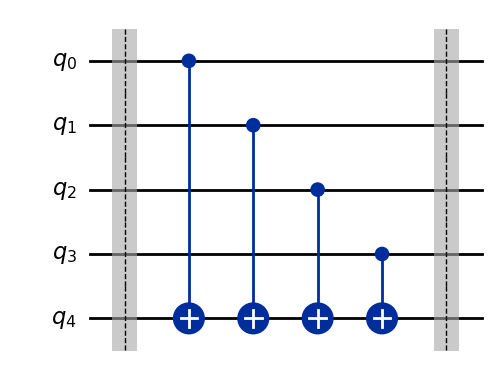

In [ ]:
balanced_oracle = QuantumCircuit(n+1)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

balanced_oracle.draw('mpl')

Now that we have a balanced oracle we can vary the input states that give 0 or 1 by wrapping some of the control nots in X-gates. *This is just to mix it up a little.* The CNOTs are already dictating that the function is balanced, but this varies the outputs a little bit to make it more challenging classically to figure out.

For each qubit in our circuit, we place an X-gate if the corresponding digit in bstr is '1', or do nothing if the digit is '0'.

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

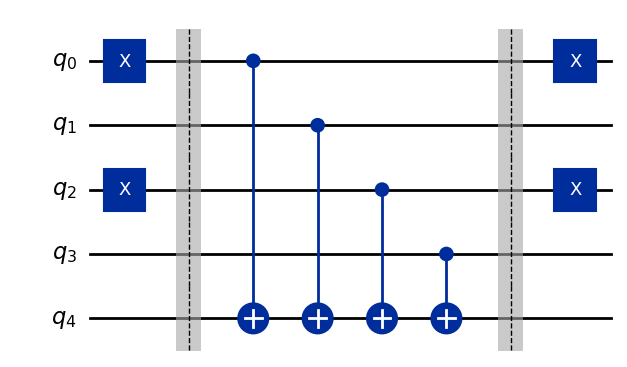

In [ ]:

bstr = "101"

balanced_oracle = QuantumCircuit(n+1)

# Place X-gates
for qubit in range(len(bstr)):
    if bstr[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider to make circuit easier to read.
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(bstr)):
    if bstr[qubit] == '1':
        balanced_oracle.x(qubit)

balanced_oracle.name = "Balanced Oracle"

# Show oracle
balanced_oracle.draw('mpl')

Breaking down this circuit:

1. Flip some input states with X-gates to 'mix it up a little'
1. Apply controlled-NOT gates for the balanced oracle, using each input qubit as a control, and the output qubit as a target.
1. Undo the X-gates what we applied to 'mix it up' at the beginning.

(We don't want this balanced oracle to be as boring as the constant oracle do we?)

### Initializing the states

Now that the balanced oracle has been created, we need the Deutsch-Jozsa algorithm to solve it.

The first steps in the algorithm are to initialize the register:

1. Initialize the input qubits (0-3) in the state |+⟩ (with a H-gate)
1. Initialize the output qubit (4) in the state |−⟩ (with an X-gate then a H-gate)

'\nInitialize the output qubit in state |->\n'

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

'\nInitialize the input register qubits in state |+>\n'

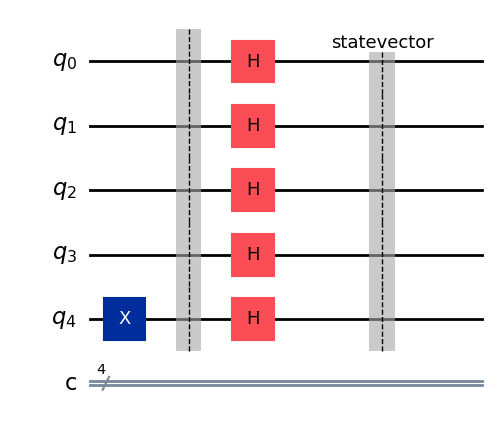

In [ ]:
dj_circuit = QuantumCircuit(n+1, n)

'''
Initialize the output qubit in state |->
'''
dj_circuit.x(n)
dj_circuit.barrier() # Barrier just keeps H gates in a single column to look nice
dj_circuit.h(n)


'''
Initialize the input register qubits in state |+>
'''
for qubit in range(n):
    dj_circuit.h(qubit)


dj_circuit.save_statevector() #Measure Statevector

dj_circuit.draw('mpl')

'#Simulate'

'# Get the statevector from result'

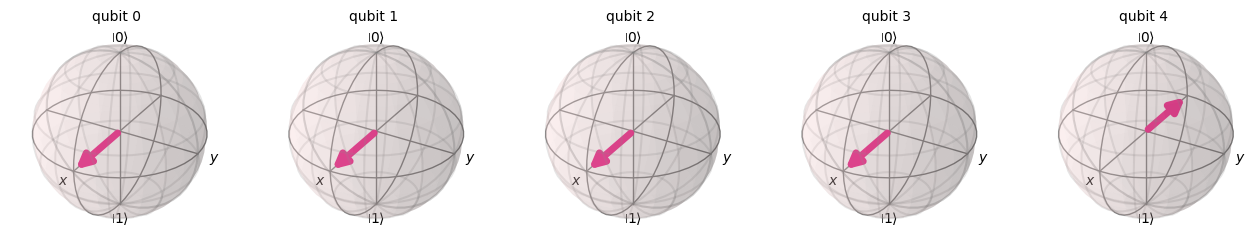

In [ ]:
'''#Simulate'''

QasmSim = QasmSimulator() #Set simulator to evolve state

job_sim = QasmSim.run(dj_circuit, shots=1) #run one shot for statevector
result_sim = job_sim.result()

'''# Get the statevector from result'''
statevector = result_sim.get_statevector(dj_circuit)

# print(statevector)

# https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.draw.html#qiskit.quantum_info.Statevector.draw

# plot_state_city(statevector)
# statevector.draw('city')

plot_bloch_multivector(statevector)

Now apply the balanced_oracle function from earlier to apply the oracle

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

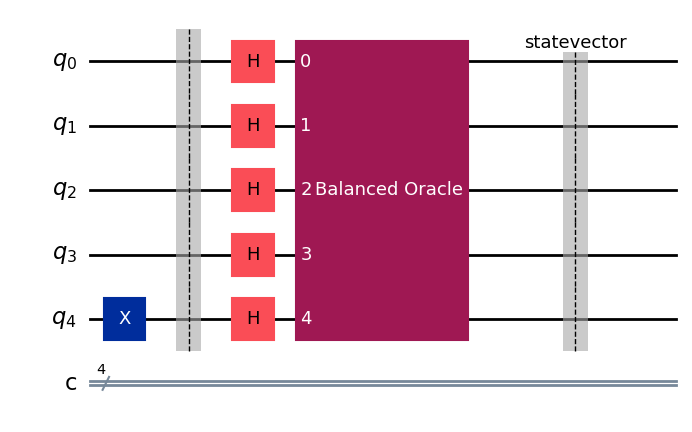

In [ ]:
dj_circuit = QuantumCircuit(n+1, n)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.barrier()
dj_circuit.h(n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Add oracle
dj_circuit.append(balanced_oracle, range(n+1))

dj_circuit.save_statevector() #Measure Statevector

dj_circuit.draw('mpl')

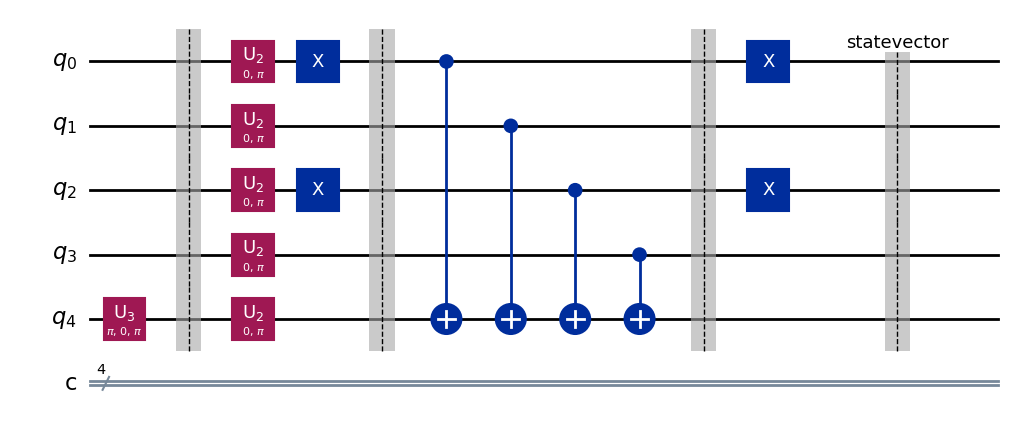

In [ ]:
decomposed_circ = dj_circuit.decompose() # Decompose circuit (but don't modify)

decomposed_circ.draw('mpl')

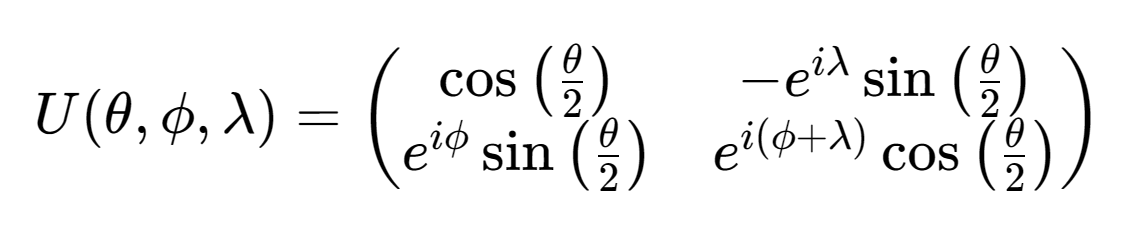

In [ ]:
'''#Simulate'''
job_sim = QasmSim.run(decomposed_circ, shots=1) #run one shot for statevector
result_sim = job_sim.result()

statevector_2 = result_sim.get_statevector(dj_circuit) #get statevector from result



'#Simulate'

Psi_1


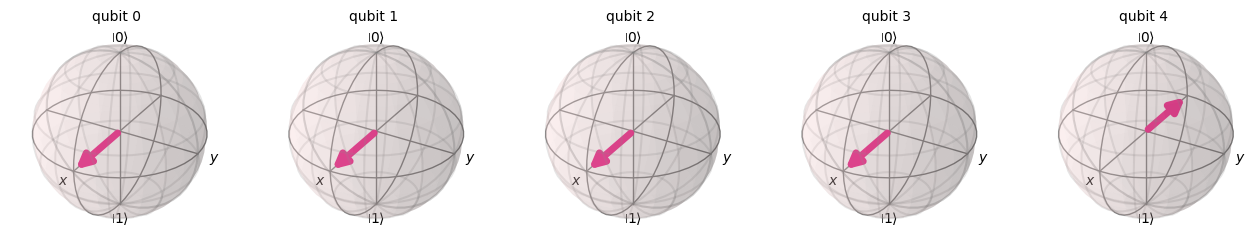

Psi_2


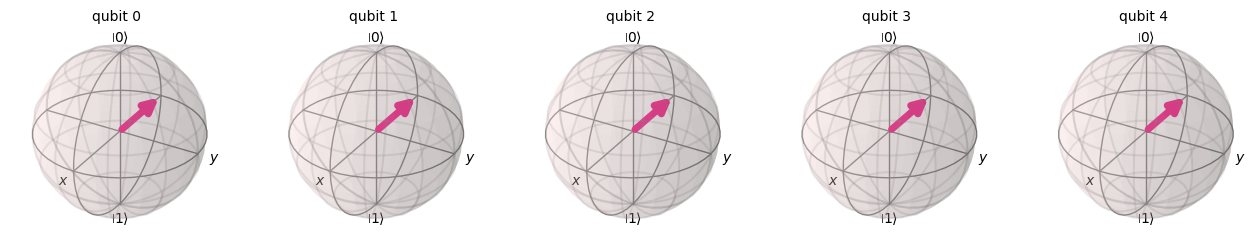

In [ ]:
# Draw the qubit states
print('Psi_1')
plot_bloch_multivector(statevector)

print('Psi_2')
plot_bloch_multivector(statevector_2)

### Phase Kickback

The output from the balanced oracle shows that each qubit in the input register has been flipped from |+⟩ to |-⟩ !

**This is due to "phase kickback".**

We typically think of CNOTs flipping the target bit only. However, when we have the input and output qubits in superpositions, the INPUT can get a phase flip depending on the output state. This 'reverse' operation is what allows us to query oracle in one step.

Finally, we perform H-gates on the n-input qubits to bring it back from the X basis (with information in phase) to the Z basis (information in the state, which we can measure).

And, last, measure the input register qubits:


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

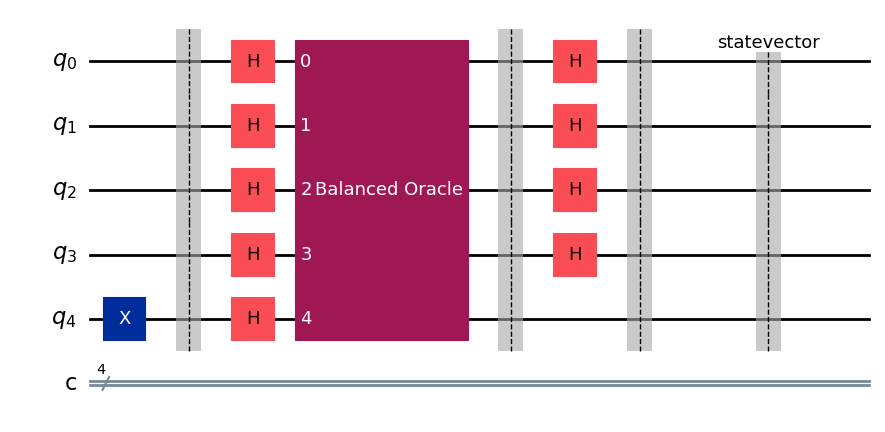

In [ ]:
dj_circuit = QuantumCircuit(n+1, n)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.barrier()
dj_circuit.h(n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)


# Add oracle
dj_circuit.append(balanced_oracle, range(n+1))

dj_circuit.barrier()

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# # Measure
# for i in range(n):
#     dj_circuit.measure(i, i)

dj_circuit.save_statevector() #Measure Statevector


# Display circuit
dj_circuit.draw('mpl')

'#Simulate'

Psi_1


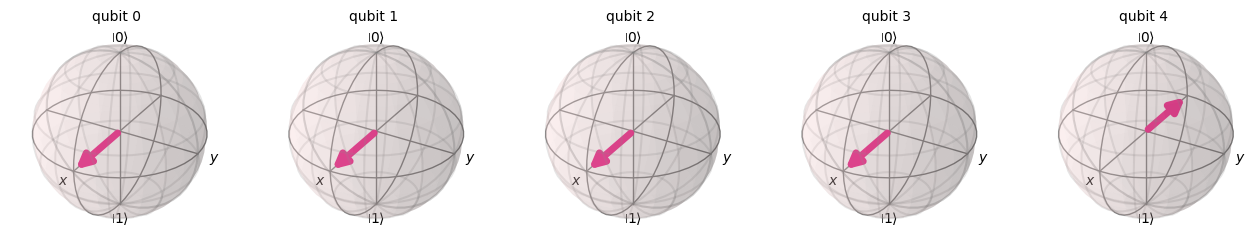

Psi_2


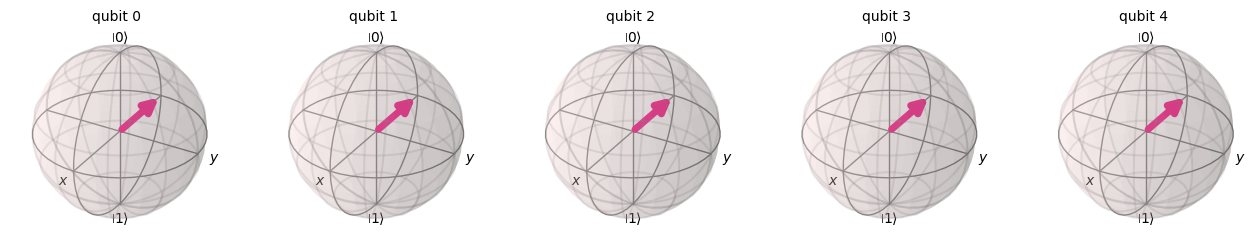

Psi_3


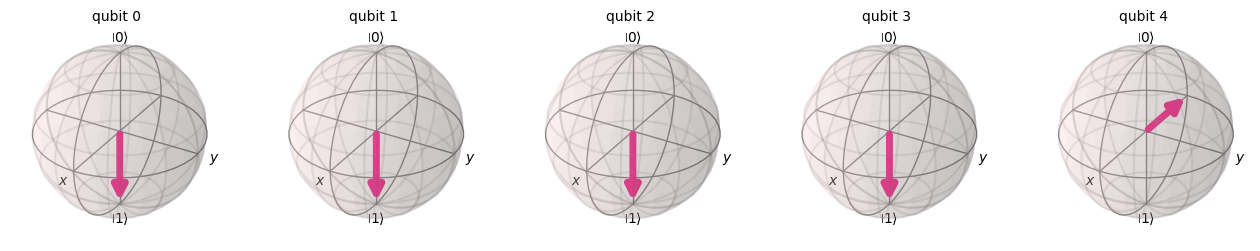

In [ ]:
'''#Simulate'''
QasmSim = QasmSimulator() #Set simulator to evolve state
decomposed_circ = dj_circuit.decompose() # Decompose circuit (but don't modify)
job_sim = QasmSim.run(decomposed_circ, shots=1) #run one shot for statevector
result_sim = job_sim.result()
statevector_3 = result_sim.get_statevector(dj_circuit) # Get the statevector from result

# Draw the qubit states
print('Psi_1')
plot_bloch_multivector(statevector)

print('Psi_2')
plot_bloch_multivector(statevector_2)

print('Psi_3')
plot_bloch_multivector(statevector_3)


All of the input bits have been flipped from initially being in |0⟩ to |1⟩!

---

##Constant Oracle

Let us see what happens with the constant oracle

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

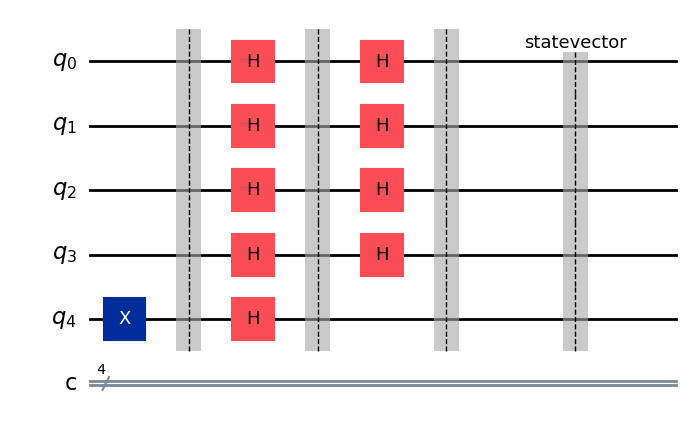

In [ ]:
dj_circuit = QuantumCircuit(n+1, n)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.barrier()
dj_circuit.h(n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Constant oracle

dj_circuit.barrier()

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# # Measure
# for i in range(n):
#     dj_circuit.measure(i, i)

dj_circuit.save_statevector() #Measure Statevector

# Display circuit
dj_circuit.draw('mpl')

'#Simulate'

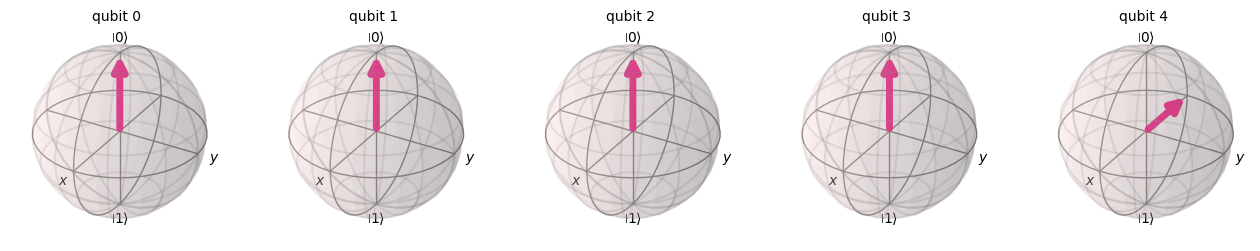

In [ ]:
'''#Simulate'''
QasmSim = QasmSimulator() #Set simulator to evolve state
job_sim = QasmSim.run(dj_circuit, shots=1) #run one shot for statevector
result_sim = job_sim.result()
statevector_const = result_sim.get_statevector(dj_circuit) # Get the statevector from result

plot_bloch_multivector(statevector_const) #plot the statevector on the Bloch Sphere

### No Phase kickback

A constant oracle doesn't have any phase kickback to the input register. So none of the input qubits are flipped. This means that it must be a constant that is independent of the inputs.


#Phase Kickback derivation

Recall first how we created an entangled state by applying a CNOT to a superposition state.

> Reference: https://qiskit.org/textbook/ch-gates/phase-kickback.html
https://github.com/Qiskit/textbook/blob/main/notebooks/ch-gates/phase-kickback.ipynb


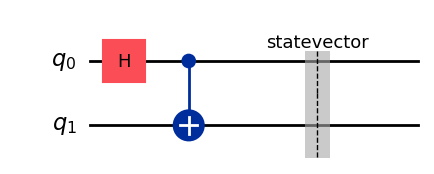

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.save_statevector() #Measure Statevector
qc.draw('mpl')

'#Simulate'

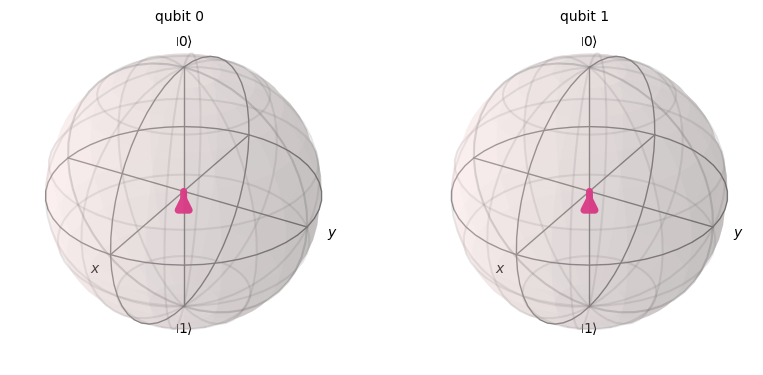

In [ ]:
'''#Simulate'''
QasmSim = QasmSimulator() #Set simulator to evolve state
job_sim = QasmSim.run(qc, shots=1) #run one shot for statevector
result_sim = job_sim.result()
statevector = result_sim.get_statevector(qc) # Get the statevector from result

plot_bloch_multivector(statevector) #plot the statevector on the Bloch Sphere

Having the control qubit 0 in a superposition caused the CNOT gate to create the Bell State:

$Ψ = \frac{1}{\sqrt{2}}(|00⟩ + |11⟩)$

If it is in 0 it doesn't flip qubit 1 but if it is in 1 it flips qubit 1.

This entangled state can not be decomposed/factored into single qubit states.

----

Now, let us also put the output state into a superposition before applying the CNOT gate and see what happens

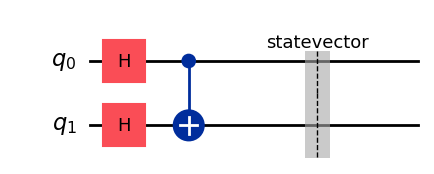

'#Simulate'

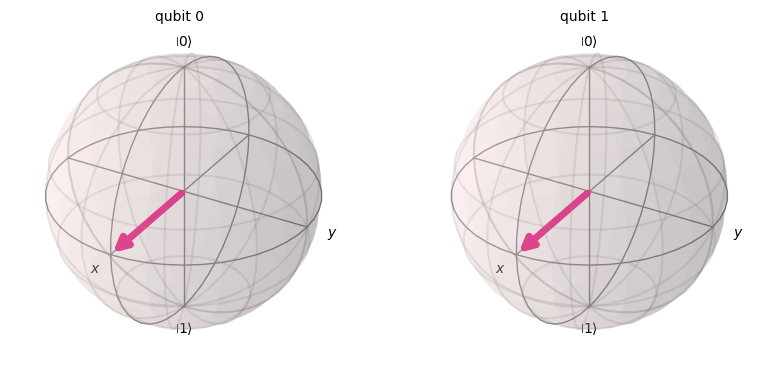

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.save_statevector() #Measure Statevector

display(qc.draw('mpl'))

'''#Simulate'''
QasmSim = QasmSimulator() #Set simulator to evolve state
job_sim = QasmSim.run(qc, shots=1) #run one shot for statevector
result_sim = job_sim.result()
statevector = result_sim.get_statevector(qc) # Get the statevector from result

plot_bloch_multivector(statevector) #plot the statevector on the Bloch Sphere

Now it seems like the CNOT gate doesn't have any effect!
We have the same state after the CNOT as we did before the CNOT.
Both qubits are in the superposition state |+⟩.

What if we flip the output qubit first so that it is in the |-⟩ state instead?

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)), clbits=())

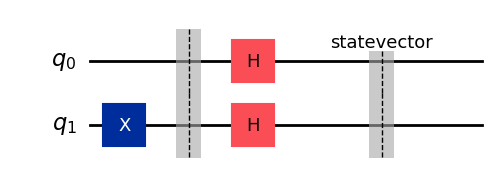

'#Simulate'

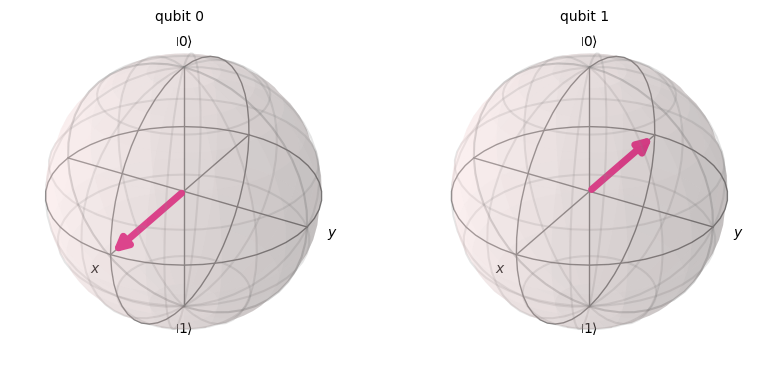

<IPython.core.display.Latex object>

Basis = |00>, |01>, |10> , |11> 


In [ ]:
qc = QuantumCircuit(2)
qc.x(1)
qc.barrier()
qc.h(0)
qc.h(1)
qc.save_statevector() #Measure Statevector

display(qc.draw('mpl'))

'''#Simulate'''
QasmSim = QasmSimulator() #Set simulator to evolve state
job_sim = QasmSim.run(qc, shots=1) #run one shot for statevector
result_sim = job_sim.result()
statevector = result_sim.get_statevector(qc) # Get the statevector from result

plot_bloch_multivector(statevector) #plot the statevector on the Bloch Sphere

display(array_to_latex(statevector, prefix="\\text{Statevector} = "))
print("Basis = |00>, |01>, |10> , |11> ")

This creates the state:

 $|q_1 q_0⟩ = |-+⟩ = $

 $= \frac{1}{\sqrt{2}} [|0⟩-|1⟩] ⊗  \frac{1}{\sqrt{2}} [|0⟩+|1⟩] $

 $= \frac{1}{2}[|00⟩ + |01⟩ - |10⟩ - |11⟩]$


> NOTE: the odd 'backwards' notation that qubit 1 is the first qubit and qubit 0 is the last qubit.

----

Now we add the CNOT again to this state:

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)), clbits=())

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)), clbits=())

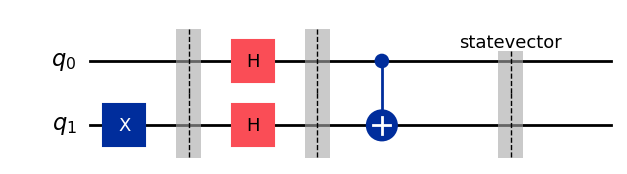

'#Simulate'

<IPython.core.display.Latex object>

Basis = |00>, |01>, |10> , |11> 
Before CNOT


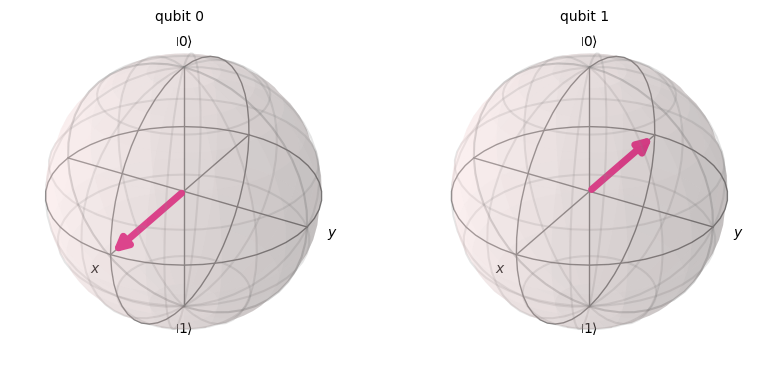

After CNOT


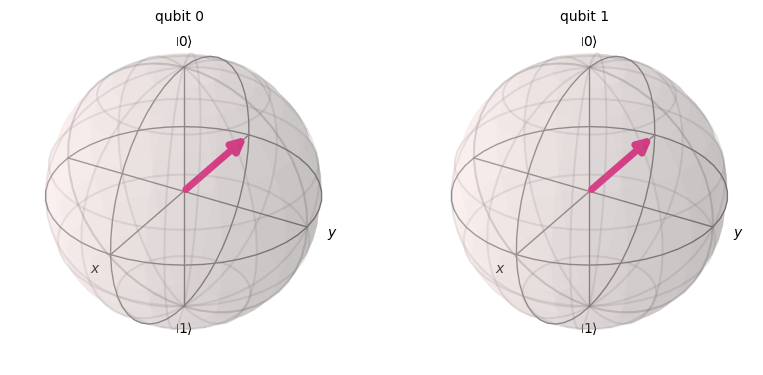

In [ ]:
qc = QuantumCircuit(2)
qc.x(1)
qc.barrier()
qc.h(0)
qc.h(1)
qc.barrier()
qc.cx(0,1)
qc.save_statevector() #Measure Statevector

display(qc.draw('mpl'))

'''#Simulate'''
QasmSim = QasmSimulator() #Set simulator to evolve state
job_sim = QasmSim.run(qc, shots=1) #run one shot for statevector
result_sim = job_sim.result()
statevector2 = result_sim.get_statevector(qc) # Get the statevector from result

display(array_to_latex(statevector2, prefix="\\text{Statevector} = "))
print("Basis = |00>, |01>, |10> , |11> ")

print('Before CNOT')
plot_bloch_multivector(statevector)
print('After CNOT')
plot_bloch_multivector(statevector2)


The CNOT acting on the state ($q_0$=control, $q_1$=target):

$ |q_1 q_0⟩ = |-+⟩ = \frac{1}{2}[|00⟩ + |01⟩ - |10⟩ - |11⟩]$

* CNOT Flips the $q_1$ in the state $|q_1 q_0⟩ =|01⟩$ to $|q_1 q_0⟩ =|11⟩$

* and conversely also flips the $q_1$ in $|q_1 q_0⟩ =|11⟩$ state to $|q_1 q_0⟩ =|01⟩$

> Again note the odd 'backwards' notation that the control qubit 0 is the last qubit and the target qubit 1 is the first qubit.

This SWAPs their amplitudes and since we had prepared them with different signs they flip **sign**.

Together:

$CNOT|-+⟩ = |q_1 q_0⟩ = $

$ = CNOT \frac{1}{2}[|00⟩ + |01⟩ - |10⟩ - |11⟩]  $

$=\frac{1}{2}[|00⟩ - |01⟩ - |10⟩ + |11⟩]$

$= \frac{1}{\sqrt{2}} [|0⟩-|1⟩] ⊗  \frac{1}{\sqrt{2}} [|0⟩-|1⟩] $

$= |--⟩$

So we get the somewhat surprising result that:

## $CNOT|-+⟩ = |--⟩$

We use this effect of phase kickback for these phase oracles by putting the input states into a superposition state of |+⟩ and the output state into the superposition state |-⟩ and see if the input states get phase kickbacks during the application of the oracle.

One way to interpret why these algorithms work is to see that they flip the input and output of the classical function. Because the output is modulo 2 it can only give information one bit at a time. By using phase kickback to make the input an output of the circuit we get a bit of information from every input bit (which is all of it). Indeed we don't even need to measure the 'output' bit!!!

#Simulate the DJ algorithm
What is the output when we have a balanced oracle?

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

'\nAdd the Balanced Oracle\n'

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

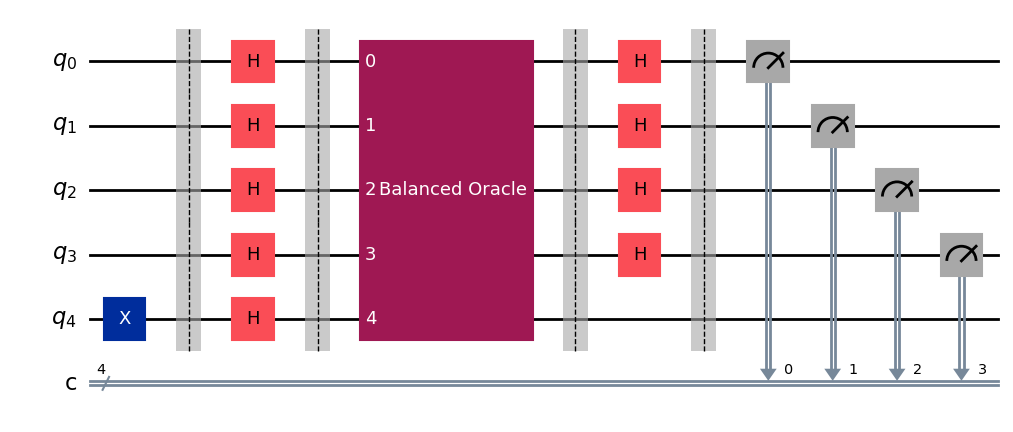

In [ ]:

dj_circuit = QuantumCircuit(n+1, n)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.barrier()
dj_circuit.h(n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

dj_circuit.barrier()

'''
Add the Balanced Oracle
'''
dj_circuit.append(balanced_oracle, range(n+1))

dj_circuit.barrier()

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')


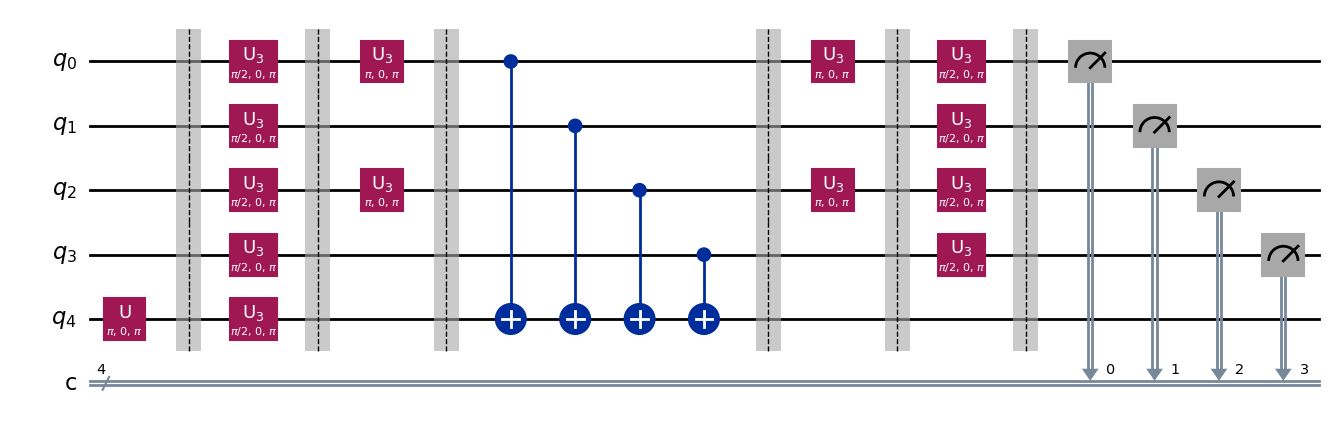

In [ ]:
decomposed_circ = dj_circuit.decompose() # Decompose circuit (but don't modify)
decomposed_circ2 = decomposed_circ.decompose() # Decompose circuit (but don't modify)
decomposed_circ2.draw('mpl')

'#Simulate'

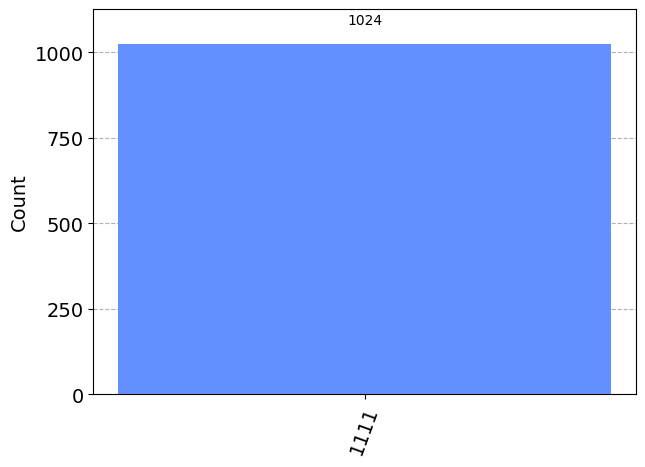

In [ ]:

'''#Simulate'''
QasmSim = QasmSimulator() #Set simulator to evolve state
n_shots = 1024
decomposed_circ = dj_circuit.decompose() # Decompose circuit (but don't modify)
job_sim = QasmSim.run(decomposed_circ, shots=n_shots)
result_sim = job_sim.result()
counts = result_sim.get_counts()

# Plot results
plot_histogram(counts)

If the state is not all 0's  |0 0 0 0⟩ that means the function is balanced.

We can see from the results above that we have a 0% chance of measuring 0000 (or any other state than |1111⟩ for that matter).

This correctly predicts the function is balanced.

# Run on fake IBM hardware

In [ ]:
from qiskit_ibm_provider import IBMProvider
IBMProvider.save_account(token='API_TOKEN_HERE', overwrite =True)

In [ ]:
from qiskit_aer import AerSimulator
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler

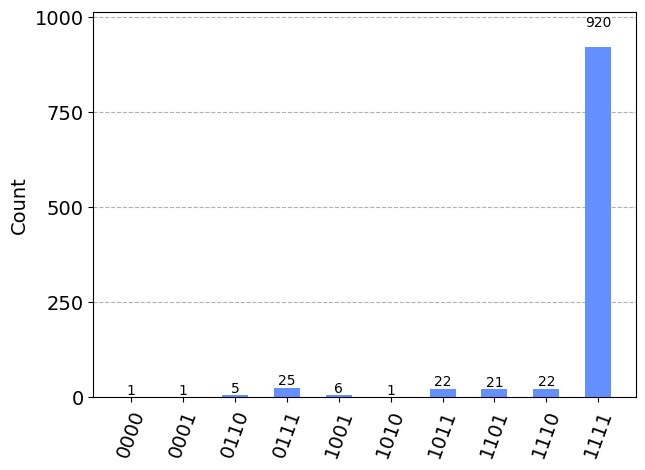

In [ ]:
# # Run the sampler job locally using AerSimulator.
# aer_sim = AerSimulator()
service = QiskitRuntimeService()

# Specify a system to use for the noise model
real_backend = service.backend("ibm_brisbane")
aer = AerSimulator.from_backend(real_backend)
backend = aer

# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(decomposed_circ, backend)
# transpiled_circuit.draw('mpl', style="iqp")

# Run the transpiled circuit using the simulated fake backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

In [ ]:
answer = counts.most_frequent()
print( 'Most frequent measured bit string = ' , answer)

Most frequent measured bit string =  1111


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()

# Display all backends you have access.
print(service.backends())

[<IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('simulator_mps')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_osaka')>, <IBMBackend('ibm_sherbrooke')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_statevector')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('ibm_brisbane')>]


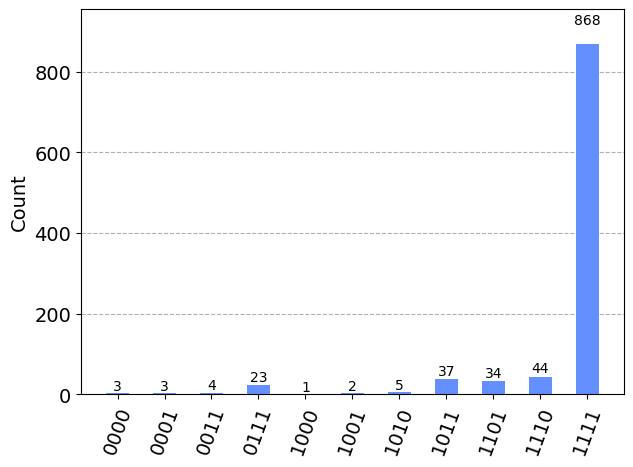

In [ ]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler


# Import the fake backend from the fake provider
from qiskit_ibm_runtime.fake_provider import FakeGuadalupeV2

# Get a fake backend from the fake provider
backend = FakeGuadalupeV2()

# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(decomposed_circ, backend)
# transpiled_circuit.draw('mpl', style="iqp")

# Run the transpiled circuit using the simulated fake backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

In [ ]:
answer = counts.most_frequent()
print( 'Most frequent measured bit string = ' , answer)

Most frequent measured bit string =  1111


We get a small chance that the state is |0000⟩ but only about 1%. This is due to errors during the circuit. Repeating the circuit many times we see we get other results ~98% of the time indicating the oracle is balanced.

#Run the Constant Oracle on fake hardware

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

'\nAdd the Constant Oracle\n'

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

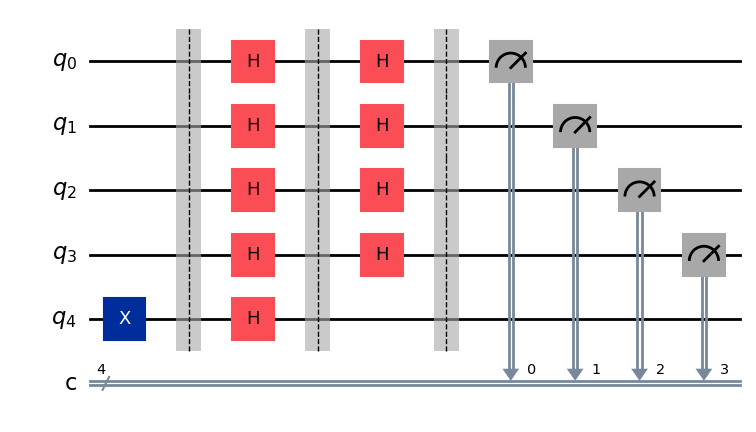

In [ ]:

dj_circuit = QuantumCircuit(n+1, n)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.barrier()
dj_circuit.h(n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

'''
Add the Constant Oracle
'''
#nothing...

dj_circuit.barrier()

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')

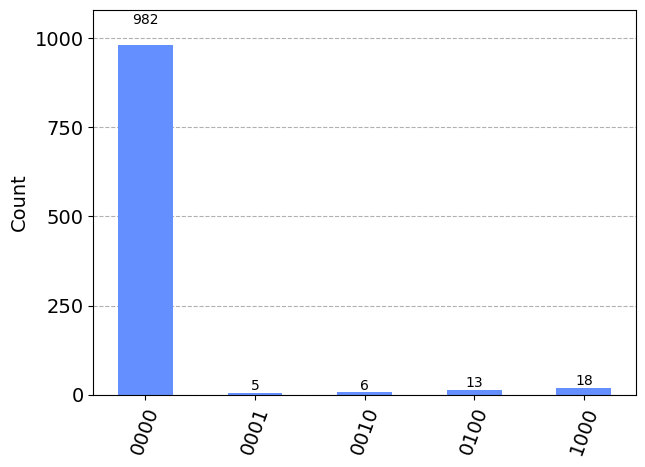

In [ ]:
# Import the fake backend from the fake provider
from qiskit_ibm_runtime.fake_provider import FakeGuadalupeV2

# Get a fake backend from the fake provider
backend = FakeGuadalupeV2()

# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(dj_circuit, backend)
# transpiled_circuit.draw('mpl', style="iqp")

# Run the transpiled circuit using the simulated fake backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

In [ ]:
answer = counts.most_frequent()
print( 'Most frequent measured bit string = ' , answer)

Most frequent measured bit string =  0000


0000! Success! It is constant oracle with no phase kick back to any of the inputs.

# Bernstein-Vazirani Algorithm

(aka, Secret Dot Product String)

Deutsch’s algorithm and the Deutsch-Jozsa algorithm both followed the same steps:
1. Apply Hadamard gates
1. Query the Oracle
1. Apply Hadamard gates again
1. Measure

Since this worked so well, are there any other problems that can be solved
by this procedure? The answer is yes. There is another problem that a quantum computer can solve using this procedure.


It is finding a **secret n-bit string** by querying an oracle which takes the dot product of the string with the input.


>That is, we again have a function 'f' that outputs 0 or 1 and can accept a long bit string 'x' as input. But now the promise is that f(x) = s·x, where 's' is an unknown string.

##How do we figure out what the secret string 's' is?

Classically, we would have to query the function with permutations of a 1 on each input.

\begin{align}
f(0001) = s_3 (0)+s_2 (0)+s_1 (0)+s_0 (1) = s_0 \\
f(0010) = s_3 (0)+s_2 (0)+s_1 (1)+s_0 (0) = s_1 \\
f(0100) = s_3 (0)+s_2 (1)+s_1 (0)+s_0 (0) = s_2 \\
f(1000) = s_3 (1)+s_2 (0)+s_1 (0)+s_0 (0) = s_3
\end{align}

Requiring n queries.

Quantum mechanically we only need one.

Let's try it.


Reference:

* [Bernstein-Varizani Algorithm, Qiskit](https://qiskit.org/textbook/ch-algorithms/bernstein-vazirani.html)
* Thomas Wong's book - 7.4 'Secret Dot Product String'

## Create the 'Secret' bit string 's'
Set the number qubits needed to represent s



In [ ]:
s = '1011'

#number of qubits required to encode s
n = len(s)
print(n)

# NOTE: If n + 1 = 5 we can run on IBM hardware for free (more than 5 qubits isn't free)

4


Apply Hadamard gates to the qubits, apply an additional Z-gate to the auxiliary qubit

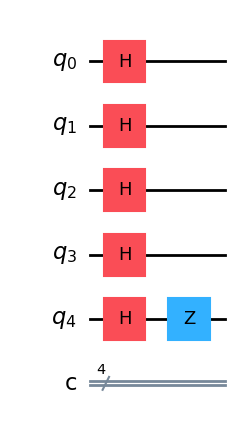

In [ ]:
# n qubits to encode 's' , plus one auxillary qubit
bv_circuit = QuantumCircuit(n+1, n)


# Initialize the auxiliary qubit to state |->
bv_circuit.h(n)
bv_circuit.z(n)

# bv_circuit.barrier()

# Apply Hadamard gates to the input register before querying the oracle
for i in range(n):
    bv_circuit.h(i)

bv_circuit.draw('mpl')

Note: we can prepare the |-⟩ state of the 'output' qubit_4 multiple ways.

Here we create the |+⟩ state first with a Hadamard, then apply a Z-gate, rotating the phase to the |-⟩ state.

Next query the inner-product oracle:

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

"\nOracle for secret 's' string\n"

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

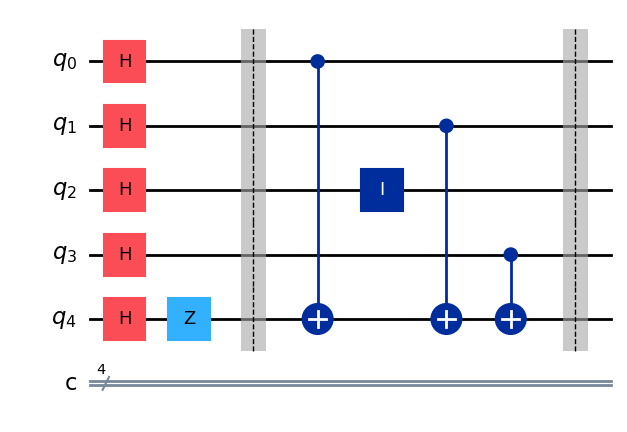

In [ ]:
bv_circuit.barrier()

'''
Oracle for secret 's' string
'''
s_rev = s[::-1] # reverse s to fit qiskit's qubit ordering

for q in range(n):
    if s_rev[q] == '0':
        #If zero just pass the qubit through
        bv_circuit.id(q)
    else:
        #If 1 then
        bv_circuit.cx(q, n)

bv_circuit.barrier()

bv_circuit.draw('mpl')

Apply Hadamard gates after querying

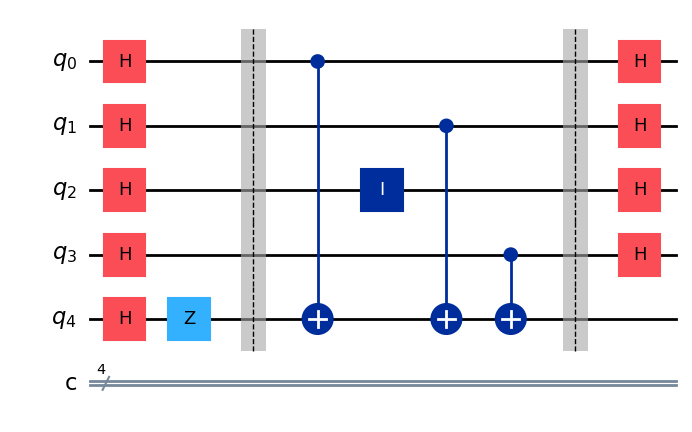

In [ ]:
#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

bv_circuit.draw('mpl')

We complete the circuit by measuring the outputs and storing them onto classical bits:

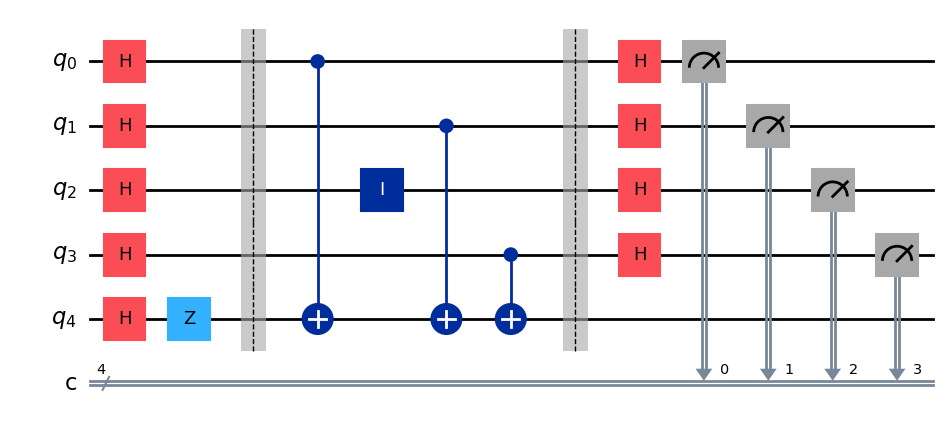

In [ ]:
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw('mpl')

Simulate the quantum circuit:

'#Simulate'

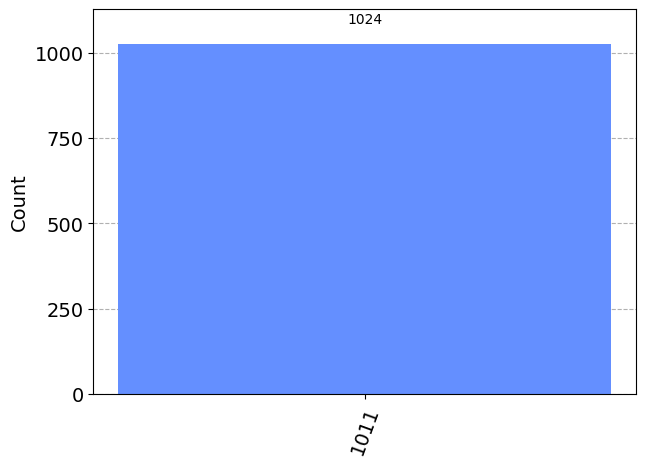

In [ ]:
'''#Simulate'''
QasmSim = QasmSimulator() #Set simulator to evolve state
job_sim = QasmSim.run(bv_circuit, shots=n_shots)
result_sim = job_sim.result()
counts = result_sim.get_counts()

# Plot results
plot_histogram(counts)

In [ ]:
#Get the most likely measured result from the counts
answer = counts.most_frequent()

print( 'Most frequent measured bit string = ' , answer)

#What was the desired solution again?
print( 'Secret s string  = ' , s)


Most frequent measured bit string =  1011
Secret s string  =  1011


## Run on fake IBM Hardware

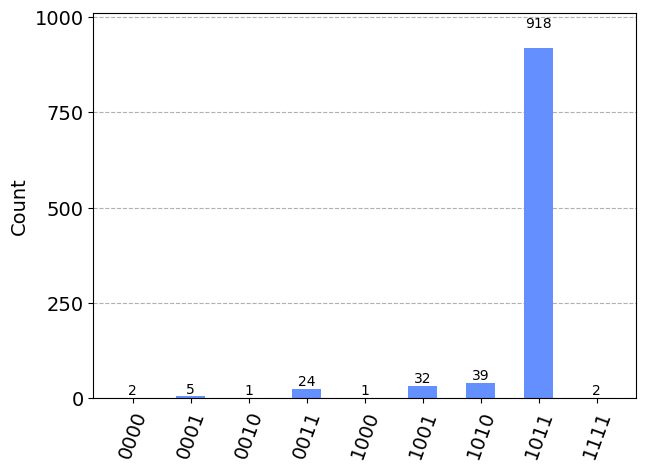

In [ ]:
# Import the fake backend from the fake provider
from qiskit_ibm_runtime.fake_provider import FakeGuadalupeV2

# Get a fake backend from the fake provider
backend = FakeGuadalupeV2()

# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(bv_circuit, backend)
# transpiled_circuit.draw('mpl', style="iqp")

# Run the transpiled circuit using the simulated fake backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

In [ ]:
#Get the most likely measured result from the counts
answer = counts.most_frequent()

print( 'Most frequent measured bit string = ' , answer)

#What was the desired solution again?
print( 'Secret s string  = ' , s)


Most frequent measured bit string =  1011
Secret s string  =  1011


Not bad! Most of the shots give the correct secret string.

## Further reading:

### Simon's Algorithm (https://qiskit.org/textbook/ch-algorithms/simon.html)

### Application-Oriented Performance Benchmarks for Quantum Computing - https://arxiv.org/abs/2110.03137

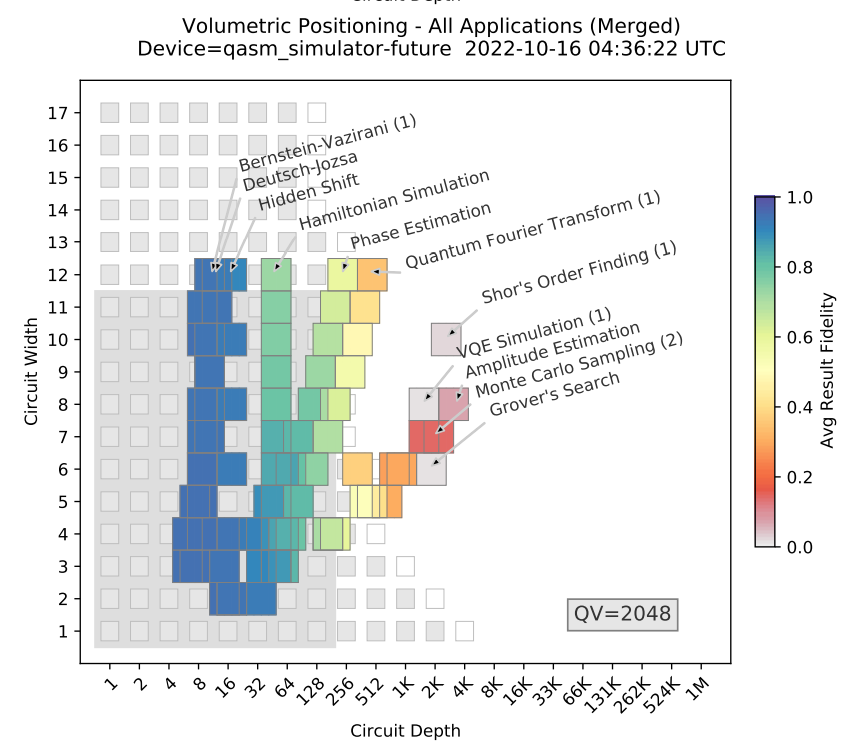

# Exercises

  1. Try breaking the Balanced Oracle by removing and/or adding gates. What do you get?

  1. Setup a Phase kickback circuit and verify the states of both qubits (and the statevector) at each step after each gate.

  1. Show how phase kickback allows the 'flip' of the control qubit and the target qubit of a CNOT gate such that if a Transmon circuit only has one way coupling between neighboring qubits, the CNOT can STILL operate in both directions.

  1. Test how well the Bernstein-Vazirani algorithm scales classically by running it with different size registers up to 12 qubits and measuring how long it takes to simulate.

  1. Try running something *anything* on IBM's 'real' hardware.

(650 students)

  1. Pick an algorithm for your groups final project. Why did you choose this algorithm?

  1. Pick one alternative algorithm for your groups final project in the event that another group also picked your top choice.


In [ ]:
'''
Exercise 1
'''


In [ ]:
'''
Exercise 2
'''
